### Qué es esto
Este archivo es parte de la resolución del TP I para la cátedra "Programación Concurrente" de la UTN FRSF 2024. Este script permite generar gráficos usando el archivo .csv exportado por el programa principal escrito en java.
Repo: https://github.com/Totremont/ConcurrentList

### Integrantes
- Izaguirre, Ezequiel
- Haulet, Tomás

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read file
data = pd.read_csv('cl-results.csv')

In [ ]:
data.head()

,Estrategia,Corrida,Hilo-1-ADD,Hilo-2-ADD,Hilo-3-ADD,Hilo-4-ADD,Hilo-5-ADD,Hilo-6-ADD,Hilo-7-ADD,Hilo-8-ADD,...,Hilo-42-CONTAINS,Hilo-43-CONTAINS,Hilo-44-CONTAINS,Hilo-45-CONTAINS,Hilo-46-CONTAINS,Hilo-47-CONTAINS,Hilo-48-CONTAINS,Hilo-49-CONTAINS,Hilo-50-CONTAINS,Supervisor
0,Fine-Grained Strategy,1,1.390937,0.515561,0.659990,0.574785,0.182633,0.686949,0.177883,0.120614,...,12.510060,14.649895,9.399376,11.425162,12.812748,6.407282,0.344312,0.103573,7.117487,31.150137
1,Fine-Grained Strategy,2,0.348293,0.372807,0.582398,0.460387,0.117261,9.479762,0.097497,0.120614,...,8.037213,1.900493,8.172564,9.616929,0.054894,0.055872,0.053428,3.559267,3.727722,18.105519
2,Fine-Grained Strategy,3,0.053009,0.061459,0.079967,0.075218,0.094214,0.111745,0.102665,0.155674,...,1.203138,1.074911,0.026959,0.148131,0.039250,2.216589,1.578738,0.054755,0.049238,16.257478
3,Fine-Grained Strategy,4,0.058177,0.057757,0.047351,0.048679,0.054824,0.053008,0.056291,4.106117,...,0.109719,0.044418,0.046304,0.980278,0.059154,0.040647,0.039739,0.041136,0.042183,9.535077
4,Fine-Grained Strategy,5,0.027028,0.037364,0.040717,0.045885,0.058177,0.059155,0.050634,0.049656,...,0.015575,0.013758,0.012851,0.013270,0.012711,0.013270,0.013269,0.014248,0.017041,7.094300


In [ ]:
# Drop columns that wont be used

df = data.drop(['Supervisor','Corrida'],axis=1)


In [ ]:
#Plotting results

# 1.First average results per strategy
for strategy in df['Estrategia'].unique():

    df_aux = df[df['Estrategia'] == strategy]
    aux_list = [strategy + '-averaged']

    for col in df_aux.columns.values[1:]:
      aux_list.append(df_aux[col].mean())

    df.loc[len(df)] = aux_list


In [ ]:
#Print new rows
df.tail()

,Estrategia,Hilo-1-ADD,Hilo-2-ADD,Hilo-3-ADD,Hilo-4-ADD,Hilo-5-ADD,Hilo-6-ADD,Hilo-7-ADD,Hilo-8-ADD,Hilo-9-ADD,...,Hilo-41-CONTAINS,Hilo-42-CONTAINS,Hilo-43-CONTAINS,Hilo-44-CONTAINS,Hilo-45-CONTAINS,Hilo-46-CONTAINS,Hilo-47-CONTAINS,Hilo-48-CONTAINS,Hilo-49-CONTAINS,Hilo-50-CONTAINS
88,Non-Blocking Strategy,0.026470,0.040228,0.071028,0.026958,0.027377,0.028914,0.034013,0.030730,0.027867,...,0.006146,0.004679,0.006635,0.006634,0.006146,0.005168,0.006705,0.006705,0.006635,0.006146
89,Non-Blocking Strategy,0.025072,0.025561,0.031218,0.028495,0.031218,0.029403,0.030381,0.033105,0.028844,...,0.006565,0.006634,0.006635,0.005168,0.007124,0.006216,0.007124,0.005657,0.006635,0.010895
90,Fine-Grained Strategy-averaged,0.087009,0.062721,0.089973,0.264436,0.427632,0.720088,0.304021,0.437740,1.187936,...,0.607647,0.786510,0.648068,0.739985,0.886503,0.557716,0.388470,0.128254,0.243489,0.502496
91,Optimistic Strategy-averaged,0.043930,0.051517,0.040230,0.069021,0.119445,0.085424,0.076040,0.063773,0.079785,...,0.012506,0.011449,0.011966,0.020736,0.012674,0.011049,0.093244,0.013149,0.012669,0.016224
92,Non-Blocking Strategy-averaged,0.044986,0.044940,0.041892,0.047491,0.048390,0.035195,0.038806,0.040065,0.041352,...,0.009291,0.008206,0.009375,0.008013,0.011710,0.008858,0.091675,0.093351,0.092389,0.008881


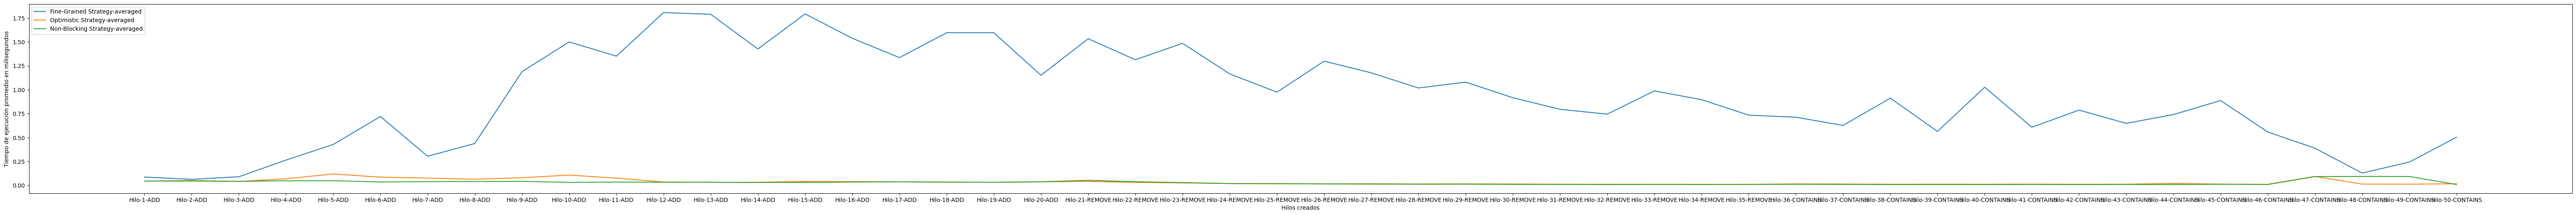

In [ ]:
# Leave only the average rows
averaged = df[df['Estrategia'].str.contains('averaged')]

x_size = len(averaged.columns.values[1:])
plt.figure(figsize=(x_size*1.6, 6))

# And print a plot for each

for strategy in averaged['Estrategia'].unique():
  aux = df[df['Estrategia'] == strategy]
  plt.plot(averaged.columns.values[1:],aux.iloc[:,1:].transpose(),label=strategy)

plt.legend(loc="upper left")
plt.xlabel("Hilos creados")
plt.ylabel("Tiempo de ejecución promedio en milisegundos")

plt.show()


In [ ]:
# We will now take the average results per operation

add_cols = averaged.columns.str.contains('ADD')
remove_cols = averaged.columns.str.contains('REMOVE')
contains_cols = averaged.columns.str.contains('CONTAINS')

aux_dic = {
    'ADD' : [],
    'REMOVE' : [],
    'CONTAINS' : []
}

for strategy in averaged['Estrategia'].unique():
  aux_df = averaged[averaged['Estrategia'] == strategy]
  aux_dic['ADD'].append(aux_df.loc[:,add_cols].mean(axis=1).item())
  aux_dic['REMOVE'].append(aux_df.loc[:,remove_cols].mean(axis=1).item())
  aux_dic['CONTAINS'].append(aux_df.loc[:,contains_cols].mean(axis=1).item())

op_df = pd.DataFrame(aux_dic,index=averaged['Estrategia'].unique())


In [ ]:
op_df.head()

,ADD,REMOVE,CONTAINS
Fine-Grained Strategy-averaged,1.022838,1.074233,0.621894
Optimistic Strategy-averaged,0.056443,0.017837,0.018668
Non-Blocking Strategy-averaged,0.037534,0.017587,0.025858


[]

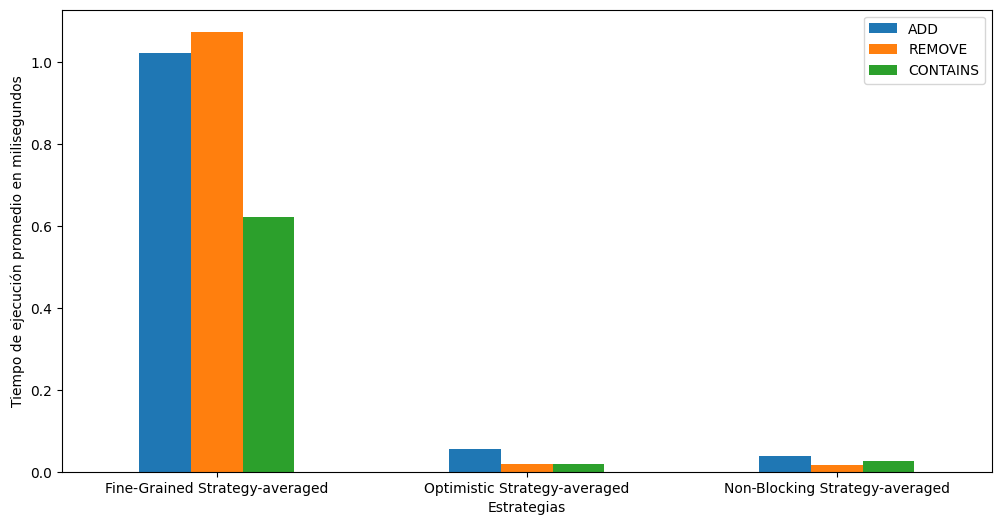

In [ ]:
# Print grouped bar chart
ax = op_df.plot.bar(rot=0)
fig = ax.get_figure()
fig.set_size_inches(12, 6)
ax.set_xlabel("Estrategias")
ax.set_ylabel("Tiempo de ejecución promedio en milisegundos")
plt.plot()

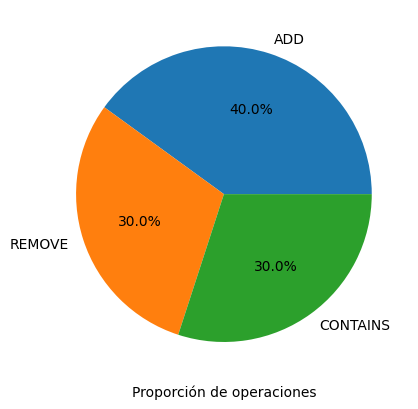

In [ ]:
# Finally we will print the proportion

def filter_cols(lt):
  aux = filter(lambda x: x == True, lt)
  return len(list(aux))

labels = ['ADD','REMOVE','CONTAINS']
sizes = [filter_cols(add_cols),filter_cols(remove_cols),filter_cols(contains_cols)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_xlabel("Proporción de operaciones")

plt.show()